<a href="https://colab.research.google.com/github/aa5649/Supermart-sales---EDA-practice/blob/main/EDA_practice_Supermar_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Printing Dataset

In [5]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
print(df['State'].unique())

['Tamil Nadu']


Since the supermart is based in Tamil Nadu, the 'state' column can be dropped. And also, the 'order id' is not useful in anyway, so it can be dropped as well.

In [7]:
df.drop(['Order ID','State'],axis =1, inplace = True)
df.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45


In [8]:
df.shape       #There are 9949 values and 9 categories

(9994, 9)

In [9]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape         #There are no duplicate values in the dataset

(9994, 9)

Names of the customers isn't useful for the analysis. Hence, it can be dropped as well.

In [11]:
df.drop(['Customer Name'],axis=1,inplace = True)
df.head()

,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60
4,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45


In [12]:
df.info()                         #No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      9994 non-null   object 
 1   Sub Category  9994 non-null   object 
 2   City          9994 non-null   object 
 3   Order Date    9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Sales         9994 non-null   int64  
 6   Discount      9994 non-null   float64
 7   Profit        9994 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 702.7+ KB


In [13]:
df.nunique()

Category           7
Sub Category      23
City              24
Order Date      1236
Region             5
Sales           1989
Discount          26
Profit          8380
dtype: int64

# Sales by Region

In [14]:
#Different regions in region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

In [15]:
#remove the row with region=NORTH
df.drop((df[df['Region']=='North']).index,inplace=True)

In [16]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
Name: Region, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


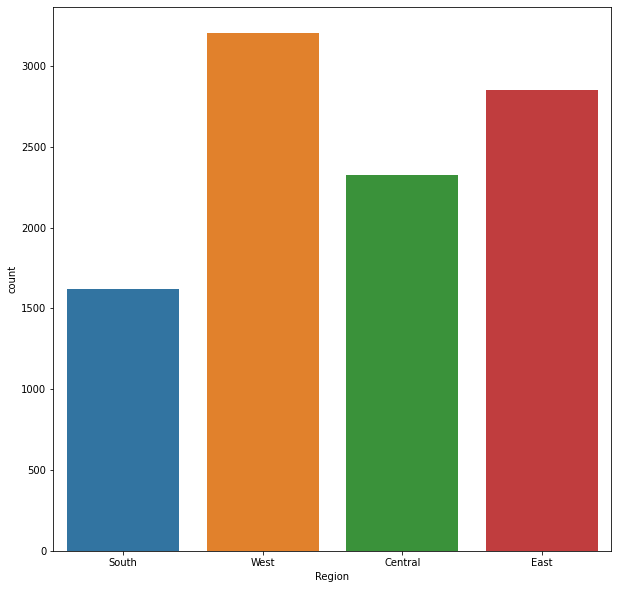

In [17]:
plt.figure(figsize = (10,10))
ax = sns.countplot(df['Region'])

# Sales by Category

In [18]:
print(df['Category'].value_counts())

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1360
Name: Category, dtype: int64


In [19]:
print(df['Category'].value_counts())

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1360
Name: Category, dtype: int64


# Sales by Sub-Category

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


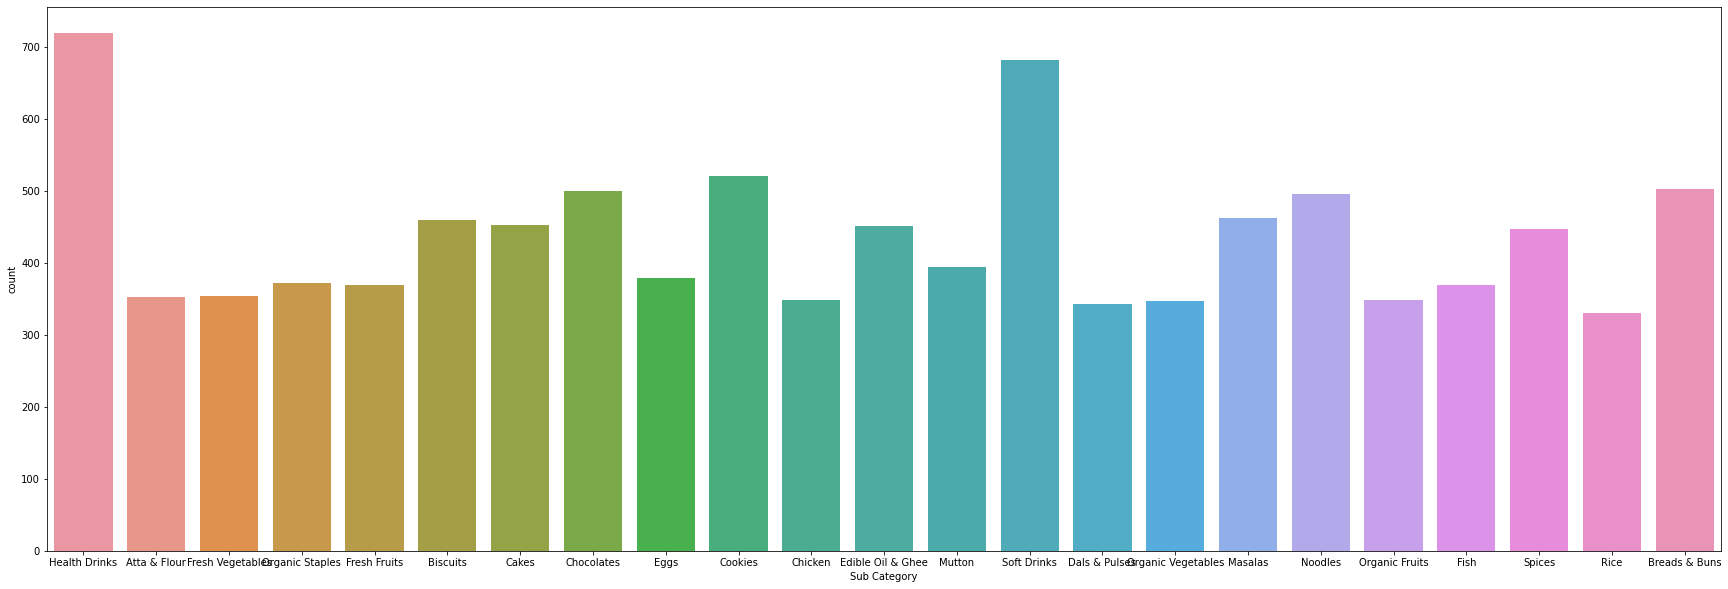

In [20]:
plt.figure(figsize = (30,10))
ax = sns.countplot(df['Sub Category'])

# Year wise Sales depiction

In [21]:
def y(date):
    h = date[-4:]
    return h

H = list(df['Order Date'])
s = []
for i in H:
    s.append(y(i))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


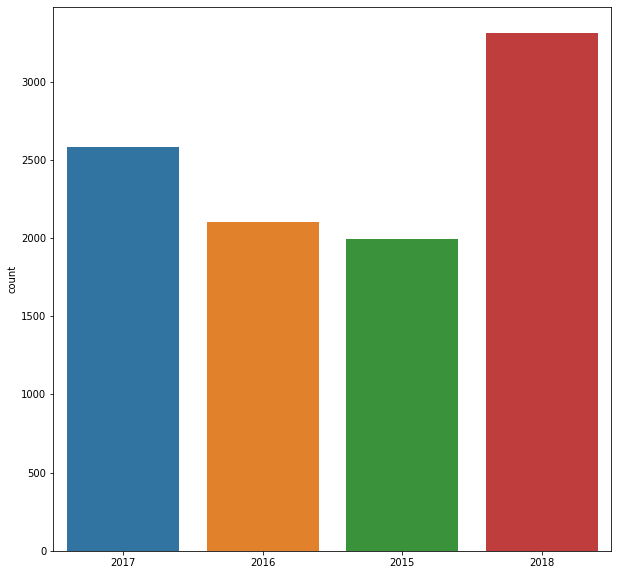

In [22]:
plt.figure(figsize = (10,10))
ax = sns.countplot(s)